In [1]:
from platform import python_version
import os
import shutil
import numpy as np
import pandas as pd
import PIL.Image
from matplotlib import pyplot as plt
from matplotlib.font_manager import findfont, FontProperties

from matplotlib.font_manager import FontProperties


path = 'D:/print_letter'


import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  
from tensorflow.keras.optimizers import *

print( 'Python Version: ', python_version() )
print( 'TensorFlow Version: ', tf.__version__ )
print( 'Keras Version: ', tf.keras.__version__ ) 

Python Version:  3.9.13
TensorFlow Version:  2.12.0
Keras Version:  2.12.0


In [2]:
OutputFolder = path

In [3]:
if not os.path.exists(OutputFolder):
    os.mkdir(OutputFolder)
    print( f'Create the new "{OutputFolder}" folder' )

os.chdir(OutputFolder)

In [5]:
a=0
b=0

for item in os.listdir(OutputFolder):
    a += 1
    for i in os.listdir(OutputFolder + '/' + item):
        b +=1


print('총: ' + str(a) + ' 단어(폴더)/합계: ' + str(b) )
print('평균 개수: ' + str(b/a))

총: 1791 단어(폴더)/합계: 37611
평균 개수: 21.0


In [7]:
TraningDataPath =  path

Current working directory: C:\Users\user\project\test2\print_letter


In [11]:
Num_Classes = len(SelectedWords)
Image_Size = ( 50, 50 )
Epochs = 50
Batch_Size = 8

In [12]:
Train_Data_Genetor = ImageDataGenerator( rescale = 1./255, validation_split = 0.2,
                                         width_shift_range = 0.05,   
                                         height_shift_range = 0.05,
                                         zoom_range = 0.1,  
                                         horizontal_flip = False )

In [13]:
Train_Generator = Train_Data_Genetor.flow_from_directory( TraningDataPath ,
                                                          target_size = Image_Size,
                                                          batch_size = Batch_Size,
                                                          class_mode = 'categorical',
                                                          shuffle = True, 
                                                          subset = 'training' )

Found 697 images belonging to 41 classes.


In [16]:
Val_Data_Genetor = ImageDataGenerator( rescale=1./255, validation_split = 0.2 )

In [17]:
Val_Generator = Train_Data_Genetor.flow_from_directory( TraningDataPath ,
                                                        target_size = Image_Size,
                                                        batch_size = Batch_Size,
                                                        class_mode = 'categorical',
                                                        shuffle = True, 
                                                        subset = 'validation' )

Found 164 images belonging to 41 classes.


In [18]:
CNN = Sequential( name = 'CNN_Model' )
CNN.add( Conv2D( 5, kernel_size = (2,2), padding = 'same', 
                 input_shape = (Image_Size[0],Image_Size[1],3), name = 'Convolution' ) )
CNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling' ) )
CNN.add( Flatten( name = 'Flatten' ) )
CNN.add( Dropout( 0.5, name = 'Dropout_1' ) )
CNN.add( Dense( 512, activation = 'relu', name = 'Dense' ) )
CNN.add( Dropout( 0.5, name = 'Dropout_2' ) )
CNN.add( Dense( Num_Classes, activation = 'softmax', name = 'Softmax' ) )
CNN.summary()

Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution (Conv2D)        (None, 50, 50, 5)         65        
                                                                 
 Pooling (MaxPooling2D)      (None, 25, 25, 5)         0         
                                                                 
 Flatten (Flatten)           (None, 3125)              0         
                                                                 
 Dropout_1 (Dropout)         (None, 3125)              0         
                                                                 
 Dense (Dense)               (None, 512)               1600512   
                                                                 
 Dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 Softmax (Dense)             (None, 41)                21

In [19]:
CNN.compile( optimizer = Adam(),
             loss = 'categorical_crossentropy', 
             metrics = ['accuracy'] )

In [20]:
History = CNN.fit( Train_Generator,
                   steps_per_epoch = Train_Generator.samples//Batch_Size,
                   validation_data = Val_Generator,
                   validation_steps = Val_Generator.samples//Batch_Size,
                   epochs = Epochs )

Epoch 1/50
87/87 [==============================] - 3s 28ms/step - loss: 4.0623 - accuracy: 0.0218 - val_loss: 3.6736 - val_accuracy: 0.0375
Epoch 2/50
87/87 [==============================] - 1s 12ms/step - loss: 3.6858 - accuracy: 0.0392 - val_loss: 3.5884 - val_accuracy: 0.1000
Epoch 3/50
87/87 [==============================] - 1s 12ms/step - loss: 3.5627 - accuracy: 0.0740 - val_loss: 3.3669 - val_accuracy: 0.1937
Epoch 4/50
87/87 [==============================] - 1s 12ms/step - loss: 3.2883 - accuracy: 0.1335 - val_loss: 2.9888 - val_accuracy: 0.2375
Epoch 5/50
87/87 [==============================] - 1s 13ms/step - loss: 3.0282 - accuracy: 0.2148 - val_loss: 2.7008 - val_accuracy: 0.3438
Epoch 6/50
87/87 [==============================] - 1s 12ms/step - loss: 2.7341 - accuracy: 0.2743 - val_loss: 2.3510 - val_accuracy: 0.4062
Epoch 7/50
87/87 [==============================] - 1s 13ms/step - loss: 2.4147 - accuracy: 0.3425 - val_loss: 2.0857 - val_accuracy: 0.4750
Epoch 8/50
87

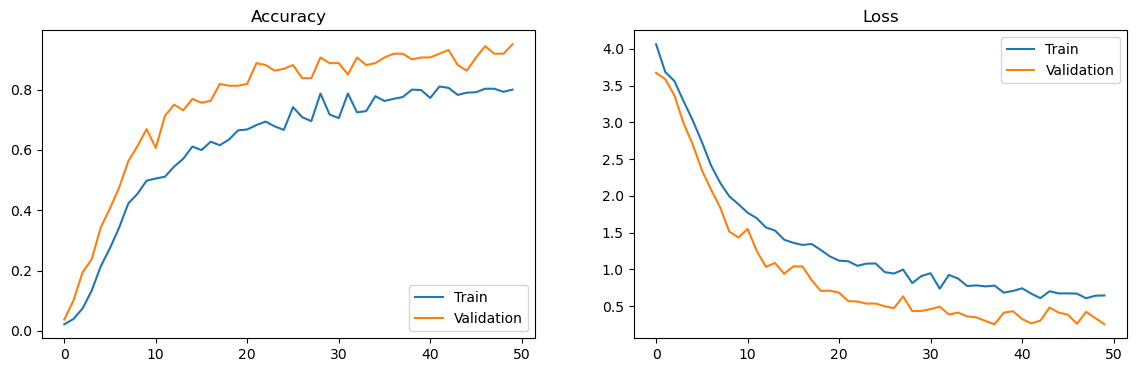

In [22]:
Train_Accuracy = History.history['accuracy']
Val_Accuracy = History.history['val_accuracy']
Train_Loss = History.history['loss']
Val_Loss = History.history['val_loss']
epochs_range = range(Epochs)

plt.figure( figsize=(14,4) )
plt.subplot( 1,2,1 )
plt.plot( range( len(Train_Accuracy) ), Train_Accuracy, label='Train' ) 
plt.plot( range( len(Val_Accuracy) ), Val_Accuracy, label='Validation' ) 
plt.legend( loc='lower right' )
plt.title( 'Accuracy' )

plt.subplot( 1,2,2 )
plt.plot( range( len(Train_Loss) ), Train_Loss, label='Train' )
plt.plot( range( len(Val_Loss) ), Val_Loss, label='Validation' )
plt.legend( loc='upper right' )
plt.title( 'Loss')

plt.show()

In [23]:
model_path = 'C:/Users/user/project/chinese'

In [24]:
os.chdir( model_path )
CNN.save( 'CNN_Model.h5' )